# [Dacon_신용카드 사용자 연체 예측](https://dacon.io/competitions/official/236116/data)
[참고](https://dacon.io/competitions/official/236116/codeshare/8753?page=1&dtype=random)

index: 고유한 인덱스
gender: 성별
car: 차 소유 여부
reality: 부동산 소유 여부
child_num: 자녀 수
income_total: 총 수입
income_type: 소득 유형
edu_type: 교육 수준
family_type: 가족 유형
house_type: 주택 유형
DAYS_BIRTH: 출생일로부터의 날짜
DAYS_EMPLOYED: 고용일로부터의 날짜
FLAG_MOBIL: 모바일 전화 소유 여부
work_phone: 업무용 전화 소유 여부
phone: 전화 소유 여부
email: 이메일 소유 여부
occyp_type: 직업 유형
family_size: 가족 규모
begin_month: 신용카드 발급일로부터의 월 수
credit: 신용도 (타겟 변수)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
train = pd.read_csv(os.getcwd() + '/data/credit card/train.csv').drop('index', axis=1)
display(train.head(3))
print(train.shape)
print(train.info())

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


(26457, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64

In [16]:
# 범주형 변수의 범주 구성 확인
for col in train.select_dtypes('object').columns.tolist():
    print(f'### {col} ###')
    print(train[col].unique())
    print('\n')

### gender ###
['F' 'M']


### car ###
['N' 'Y']


### reality ###
['N' 'Y']


### income_type ###
['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']


### edu_type ###
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


### family_type ###
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']


### house_type ###
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


### occyp_type ###
[nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']




In [3]:
# 결측치 확인
train.isna().sum() # occyp_type: 8,171개

# 결측치 대체(최빈값)
train.loc[train['occyp_type'].isna(), 'occyp_type'] = train['occyp_type'].value_counts().index[0]
train.isna().sum().sum() # 결측치 대체 완료

0

In [29]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


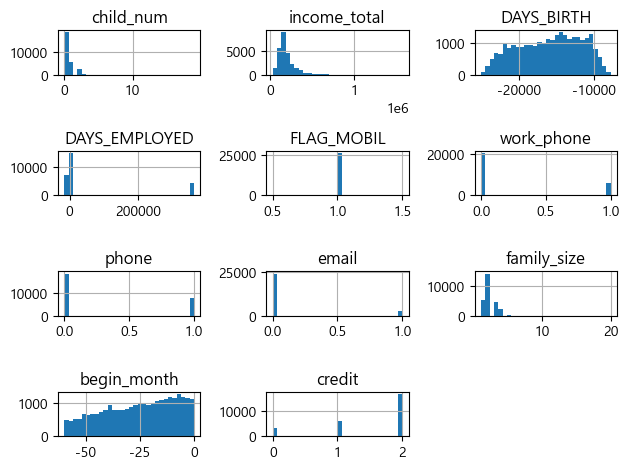

In [33]:
train.hist(bins=30)
plt.tight_layout()
plt.show()

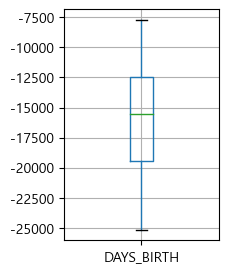

In [39]:
train[['DAYS_BIRTH']].boxplot(figsize=(2,3))
plt.show()

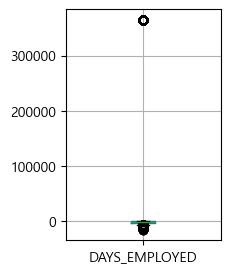

In [49]:
train[['DAYS_EMPLOYED']].boxplot(figsize=(2,3))
plt.show()

In [4]:
# DAYS_EMPLOYED 이상치 대체(중앙값)
train.loc[train['DAYS_EMPLOYED']==np.max(train['DAYS_EMPLOYED']), 'DAYS_EMPLOYED']\
                                =np.median(train['DAYS_EMPLOYED'])

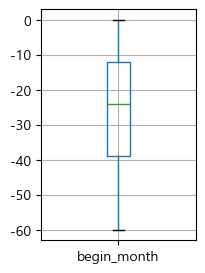

In [50]:
train[['begin_month']].boxplot(figsize=(2,3))
plt.show()

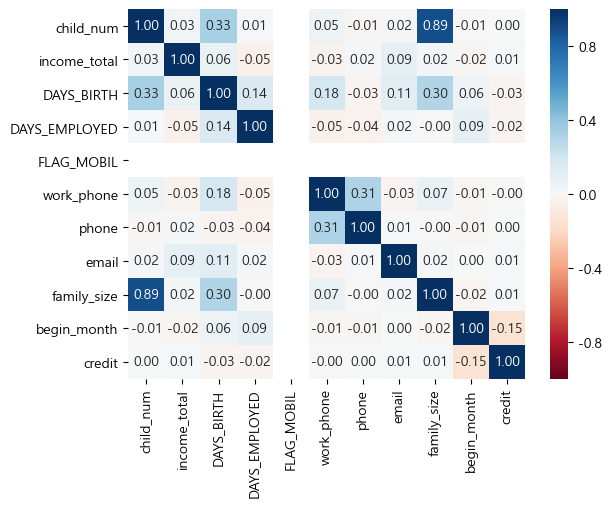

In [5]:
train_corr = train.corr()
sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='RdBu')
plt.show()

1. 데이터 결측치 존재 여부
    - occyp_type 칼럼에 결측치가 존재했으며 최빈값으로 대체하였다.
1. 데이터 타입 구성
    - 종속변수인 credit은 float형이고, 독립변수는 object, int, float형으로 구성되었다.
1. 종속변수와 독립변수 간 상관관계
    - 종속변수와 독립변수 간 상관관계를 파악한 결과, 높은 상관성은 존재하지 않았다.
1. 독립변수 간 상관관계
    - 독립변수 간 상관관계를 확인한 결과, family_size와 child_total의 상관계수가 약 0.89로 다중공선성을 의심할 수 있다.

### 2. 통계분석
#### 1. 독립표본 t-test
- 귀무가설: 부동산 소유 여부에 따라 총 수입에 차이가 없다.
- 대립가설: not H0

In [5]:
import scipy.stats as stats
reality_n = train[train['reality']=='N']['income_total']
reality_y = train[train['reality']=='Y']['income_total']

stats.shapiro(reality_n) # 정규성 불만족
stats.shapiro(reality_y) # 정규성 불만족

stats.mannwhitneyu(reality_n, reality_y) # 귀무가설 기각

MannwhitneyuResult(statistic=74273086.5, pvalue=5.686432483612073e-06)

#### 2. 교차검정

In [6]:
from statsmodels.stats.contingency_tables import Table

# 카이제곱 검정을 수행할 컬럼을 설정합니다.
variables_to_compare = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']
chi2_results_multi = []

# 2개 이상을 가지는 범주에 대한 카이제곱 검정을 수행합니다.
for variable in variables_to_compare:
    contingency_table = pd.crosstab(train[variable], train['credit'])

    # Table 클래스로 카이제곱 검정을 수행합니다.
    table = Table(contingency_table)
    result = table.test_nominal_association()
    chi2_stat = result.statistic
    p_value = result.pvalue

    # 결과를 저장합니다.
    chi2_results_multi.append({
        "variable": variable,
        "chi2_statistic": chi2_stat,
        "p_value": p_value
    })

chi2_results_multi_df = pd.DataFrame(chi2_results_multi)
chi2_results_multi_df

,variable,chi2_statistic,p_value
0,gender,0.753743,0.686004
1,car,9.396436,0.009111
2,reality,11.231612,0.003640
3,work_phone,0.363705,0.833724
4,phone,8.035167,0.017996
5,email,6.065864,0.048174


#### 3. 비계층적 군집분석

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
sub_df = train[['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']]
scaler=MinMaxScaler()
sub_df_sc = scaler.fit_transform(sub_df)

for k in range(2,10): # 클러스터별 콜린스키 하라바츠 결과 비교
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(sub_df_sc)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(sub_df_sc, labels))

14610.432332011
15335.089543151536
14733.080563388901
13669.091041586276
13103.685419256157
12437.758274571333
11972.88192739305
11708.375417725383


- k값이 3일 때 가장 높은 값을 가지는 것을 확인했다. 하지만 콜린스키 하라바츠 스코어 값만으로 k값을 확정짓기 어려우므로 엘보우 기밥을 사용하여 적절한 k값을 선택할 수 있다.

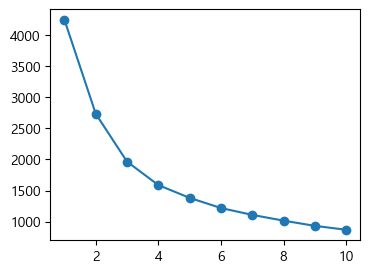

[4242.531138053172, 2733.112662983398, 1964.709989592183, 1588.4656202936453, 1383.2867697359925, 1220.1901462196072, 1110.2032155094464, 1017.7040197287588, 934.1628731153796, 871.4076844405896]


In [8]:
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.figure(figsize=(4,3))
    plt.plot(range(1,11), sse, marker='o')
    plt.show()
    print(sse)
elbow(sub_df_sc)

- k 값이 3에서 4로 갈 때에 기울기 소실이 발생하므로, 해당 데이터에서는 2~3개의 군집이 적절함을 알 수 있다.
- 따라서 k 값을 3으로 지정해서 최종 군집분석을 수행한다.

In [42]:
# 최적의 k로 KMeans 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(sub_df_sc)

# 할당된 군집을 train_cluster에 추가
new_labels=km.labels_
train_cluster = sub_df.copy()
train_cluster['cluster']=new_labels
train_cluster.groupby(['cluster']).mean()

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
cluster,,,,,
0,189906.556832,-12371.041877,-1926.875735,2.445319,-15.845508
1,189813.048309,-16228.585919,-2780.387010,2.231971,-44.914295
2,180950.322498,-20131.686799,-2723.435184,1.841356,-15.877489


In [43]:
train_cluster.cluster.value_counts()

0    9528
1    9346
2    7583
Name: cluster, dtype: int64

In [44]:
# 실루엣 분석을 통한 군집 평가
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(sub_df, train_cluster.cluster)
train_cluster['silhouette_coeff']=score_samples
average_score = silhouette_score(sub_df, train_cluster.cluster)
print('실루엣 분석 점수: {:.3f}'.format(average_score))

실루엣 분석 점수: -0.013


In [45]:
train_cluster.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.021044
1   -0.039942
2   -0.023471
Name: silhouette_coeff, dtype: float64

In [46]:
# train_cluster와 credit 값 결합
train_cluster =pd.concat([train_cluster, train.credit], axis=1)

# target 값에 따라 cluster 값이 어떻게 매핑됐는지 확인
cluster_result = train_cluster.groupby(['credit'])['cluster'].value_counts()
print(cluster_result)

credit  cluster
0.0     0          1279
        1          1023
        2           920
1.0     0          2593
        2          1989
        1          1685
2.0     1          6638
        0          5656
        2          4674
Name: cluster, dtype: int64


#### 4. 혼합분포 군집분석

In [47]:
from sklearn.mixture import GaussianMixture
# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(sub_df_sc)
gmm_labels = gmm.predict(sub_df_sc)
# 군집의 변수별 통계량 확인
train_cluster['gmm_cluster']=gmm_labels
train_cluster.drop(['cluster','silhouette_coeff'], axis=1).groupby('gmm_cluster').mean()

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
gmm_cluster,,,,,,
0,154300.361104,-20084.162199,-1335.368052,1.786399,-25.729587,1.524225
1,171927.050162,-12222.521724,-1837.117792,2.578425,-25.340648,1.500132
2,251303.130338,-17257.160271,-4790.404212,2.051212,-27.871466,1.546018


In [48]:
train_cluster.gmm_cluster.value_counts()

1    11393
0     8132
2     6932
Name: gmm_cluster, dtype: int64

In [49]:
# 실루엣 분석을 통한 군집 평가
score_samples = silhouette_samples(sub_df, train_cluster.gmm_cluster)
train_cluster['gmm_silhouette_coeff']=score_samples
average_score = silhouette_score(sub_df, train_cluster.gmm_cluster)
print('실루엣 분석 점수: {:.3f}'.format(average_score))

실루엣 분석 점수: -0.051


In [50]:
train_cluster.groupby('gmm_cluster')['gmm_silhouette_coeff'].mean()

gmm_cluster
0    0.024818
1    0.024753
2   -0.265976
Name: gmm_silhouette_coeff, dtype: float64

In [51]:
# target 값에 따라 cluster 값이 어떻게 매핑됐는지 확인
gmm_cluster_result = train_cluster.groupby(['credit'])['gmm_cluster'].value_counts()
print(gmm_cluster_result)

credit  gmm_cluster
0.0     1              1439
        0               947
        2               836
1.0     1              2817
        0              1975
        2              1475
2.0     1              7137
        0              5210
        2              4621
Name: gmm_cluster, dtype: int64


- Kmeans와 혼합분포 군집분석 결과, 군집별 평균 실루엣 계수값이 작으므로 군집이 잘 이루어졌다고 할 수 없다.

#### 5. 밀도 기반 군집분석(DBSCAN)

In [54]:
sub_df_sc

array([[0.11337209, 0.64498195, 0.70107034, 0.05263158, 0.9       ],
       [0.14244186, 0.78936207, 0.90296891, 0.10526316, 0.91666667],
       [0.27325581, 0.34762423, 0.71859072, 0.05263158, 0.63333333],
       ...,
       [0.17151163, 0.86375881, 0.87270642, 0.05263158, 0.58333333],
       [0.09302326, 0.86014788, 0.99426606, 0.        , 0.01666667],
       [0.03488372, 0.31999771, 0.93654434, 0.05263158, 0.85      ]])

In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(sub_df_sc)

train_cluster['dbscan_cluster'] = dbscan_labels
dbscan_result = train_cluster.groupby(['credit'])['dbscan_cluster'].value_counts()
print(dbscan_result)

credit  dbscan_cluster
0.0     0                  3222
1.0     0                  6267
2.0     0                 16968
Name: dbscan_cluster, dtype: int64


In [58]:
train_cluster['dbscan_cluster'].value_counts()

0    26457
Name: dbscan_cluster, dtype: int64

### 3. 머신러닝

In [8]:
test = pd.read_csv(os.getcwd() + '/data/credit card/test.csv').drop('index', axis=1)

# occyp_type 칼럼 삭제(범주가 많기 때문)
train.drop('occyp_type', axis=1, inplace=True) 
test.drop('occyp_type', axis=1, inplace=True)

In [9]:
# 범주형 변수 인코딩
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# object type(범주형)인 변수의 리스트 추출
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

# categorical_cols 대상으로 더미 변수 생성
train_dum = pd.get_dummies(data=train, columns=categorical_cols)

['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type']


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import time

# 데이터 분할
X = train_dum.drop('credit', axis=1)
y = train_dum.credit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123, stratify=y)

In [29]:
# 모델 객체 생성
rfr_clf = RandomForestClassifier(random_state=123)
xgb_clf = XGBClassifier(random_state=123)
lgbm_clf = LGBMClassifier(random_state=123)
mlp_clf = MLPClassifier(random_state=123)

# kflod 교차검증
smote=SMOTE(random_state=123)
ro = RandomOverSampler(random_state=123)

from sklearn.model_selection import KFold
kfold =KFold()
def model_result(model, resampler=None):
    pred_li=[]
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_resample, y_train_resample = resampler.fit_resample(X_train, y_train)
        
        start=time.time()
        model.fit(X_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test)
        pred_li.append(accuracy_score(pred, y_test))
        
    print(f'### {model.__class__.__name__, resampler.__class__.__name__} ###')
    print(f'{round(end-start, 4)} sec')
    print(f'{round(np.mean(pred_li), 4)}')

# for문 수행
models = [rfr_clf,xgb_clf,lgbm_clf,mlp_clf]
resamplers=[smote, ro]
for model in models:
    for resampler in resamplers:
        model_result(model, resampler)

### ('RandomForestClassifier', 'SMOTE') ###
11.8672 sec
0.6965
### ('RandomForestClassifier', 'RandomOverSampler') ###
8.2612 sec
0.689
[09:46:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:59

- 모델별로 kfold 교차검증을 수행한 결과, ('XGBClassifier', 'SMOTE') 조합의 정확도가 상대적으로 높기 때문에 해당 조합으로 모델을 구현할 수 있을 것이다.
- MLPClassifier 모델을 제외하고는 SMOTE 방식이 랜덤오버샘플링 방식보다 정확도 값이 더 높다.
- 다음으로는 classification report로 성능을 평가하고자 한다.

In [39]:
# Classification Report
def metrics_reports(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123, stratify=y)
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
    model.fit(X_train_sm, y_train_sm)
    pred = model.predict(X_test)
    print(f'### {model.__class__.__name__} ###')
    print(classification_report(pred, y_test))
    
models = [rfr_clf,xgb_clf,lgbm_clf,mlp_clf]
for model in models:
    metrics_reports(model)

### RandomForestClassifier ###
              precision    recall  f1-score   support

         0.0       0.31      0.43      0.36       690
         1.0       0.50      0.56      0.53      1677
         2.0       0.84      0.76      0.80      5571

    accuracy                           0.69      7938
   macro avg       0.55      0.58      0.56      7938
weighted avg       0.72      0.69      0.70      7938

[10:12:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
### XGBClassifier ###
              precision    recall  f1-score   support

         0.0       0.16      0.47      0.24       332
         1.0       0.31      0.67      0.43       882
         2.0       0.94      0.71      0.81      6724

    accuracy                           0.70      7938
   macro 

- 연체자가 아닌 사람(N)을 연체자(P)로 분류하는 것 보다 연체자(P)를 연체자가 아니라고(N) 분류하는 것이 신용카드 회사 입장에서 큰 손해이므로 "정밀도"를 기준 지표로 활용할 수 있을 것이다.
- 또한 classification report 결과, 클래스가 불균형하므로 "weighted avg"를 사용하여 불균형을 고려한 성능 측정을 수행하는 것이 더 적절하다.
    - weighted avg: 클래스별로 서로 다른 가중치(weight)를 적용하여 정밀도(precision), 재현율(recall), F1-스코어(F1-score)의 평균을 계산하는 지표
- 본 분석을 통해서 test 데이터셋으로 LGBMClassifier을 활용하고자 한다.

### 4. test 데이터셋으로 예측 수행
- LGBMClassifier / SMOTE 방식 이용

In [43]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,2.0,-19.0
9996,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,2.0,-34.0
9997,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,2.0,-55.0
9998,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,2.0,-33.0
